In [1]:

import pandas as pd
import numpy as np
import xgboost as XGB
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import shap
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold, GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error,accuracy_score
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn import model_selection
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

import lightgbm as lgb
import xgboost as xgb
from xgboost import XGBClassifier

from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier, Pool, cv
import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline

In [2]:
test_set = pd.read_csv(r"D:\Task_BigDataSchool\BigDataSchool5\test.csv")
train_set = pd.read_csv(r"D:\Task_BigDataSchool\BigDataSchool5\train.csv")
features = pd.read_csv(r"D:\Task_BigDataSchool\BigDataSchool5\tabular_data.csv")
hashed_feature = pd.read_csv(r"D:\Task_BigDataSchool\BigDataSchool5\hashed_feature.csv")

In [3]:
%config InlineBackend.figure_format = 'retina'
pd.set_option('display.max_columns', 30000)
pd.set_option('display.max_row', 30000)

# EXPLORE DATA

In [4]:
test_set.head()

,id,score
0,4084,NaN
1,4085,NaN
2,4086,NaN
3,4087,NaN
4,4088,NaN


In [5]:
train_set.head()

,id,target
0,0,0
1,1,0
2,2,1
3,3,0
4,4,1


In [6]:
features.head(100)

,id,period,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49
0,0,1,110.0,55.00,0.432017,0.000000,176.78,0.000000,0.323712,NaN,147.0,0.000000,176.78,55.000000,0.248711,0.001373,0.0,0.0,0.000000,0.476549,333.60,0.277617,55.00,0.00,55.00000,21.0,0.0,f9ae10397ed62e79c644d06842bbcd92963a5927,NaN,0.00,1.00,55.000000,93.0,5562.0,93.0,0.040283,182.0,0.000000,43.50,0.0,0.0,0.00,0.00,0,0.000000,0.0,55.00,2.0,0.526552,145.0,133.28,0.000000
1,0,2,110.0,110.00,0.397517,0.000000,315.42,0.000000,0.316798,NaN,135.0,0.000000,315.42,110.000000,0.261744,-0.002248,0.0,0.0,0.000000,0.210951,428.78,0.290904,110.00,0.00,110.00000,26.0,0.0,f9ae10397ed62e79c644d06842bbcd92963a5927,NaN,0.00,0.77,110.000000,114.0,5532.0,114.0,0.047588,181.0,0.000000,85.45,0.0,0.0,15.75,0.00,0,0.000000,0.0,110.00,1.0,0.481063,130.0,229.97,0.000000
2,0,3,110.0,55.00,0.359440,0.000000,354.55,0.000000,0.339188,NaN,181.0,0.000000,354.48,55.000000,0.302164,0.002083,0.0,0.0,0.000000,0.058675,526.38,0.284842,55.00,0.00,55.00000,36.0,0.0,f9ae10397ed62e79c644d06842bbcd92963a5927,NaN,0.00,0.05,85249.281058,135.0,5501.0,136.0,0.051470,180.0,0.000000,122.70,0.0,0.0,0.00,0.07,0,0.000000,0.0,55.00,1.0,0.509598,180.0,231.78,0.000000
3,0,4,110.0,55.00,0.285707,0.000000,229.98,0.000000,0.415428,NaN,142.0,0.000000,229.98,55.000000,0.347660,0.005207,0.0,0.0,0.000000,0.966854,398.98,0.285235,55.00,0.00,55.00000,30.0,0.0,f9ae10397ed62e79c644d06842bbcd92963a5927,NaN,0.00,0.00,55.000000,102.0,5471.0,102.0,0.076190,179.0,0.000000,46.15,0.0,0.0,0.00,0.00,0,0.000000,0.0,55.00,0.0,0.680089,142.0,183.83,0.000000
4,0,5,110.0,55.00,0.101487,444.730391,307.12,0.000000,0.569670,NaN,92.0,0.000000,306.17,55.000000,0.438425,0.025736,0.0,21.0,0.000000,0.700180,215.17,0.161147,55.00,0.00,55.00000,20.0,0.0,11e623a37e87cf7995c466723ec99688d55cae8c,NaN,0.00,0.00,55.000000,82.0,5440.0,95.0,0.273205,178.0,373.498562,150.33,0.0,0.0,26.75,0.95,0,20.014485,0.0,55.00,0.0,0.776175,85.0,155.83,0.000000
5,0,6,110.0,55.00,0.083655,92.284390,277.02,0.000000,0.494765,NaN,110.0,0.000000,276.78,55.000000,0.429781,0.030347,0.0,18.0,0.000000,0.544730,279.12,0.142850,55.00,0.00,55.00000,42.0,0.0,11e623a37e87cf7995c466723ec99688d55cae8c,NaN,0.00,0.77,55.000000,106.0,5409.0,113.0,0.313367,177.0,51.409212,89.58,0.0,0.0,38.37,0.24,0,0.250835,0.0,55.00,1.0,-0.702192,98.0,187.20,0.000000
6,0,7,110.0,55.00,0.107765,543.138844,690.38,0.000000,0.522715,NaN,190.0,0.000000,688.82,55.000000,0.433959,0.018277,0.0,2.0,0.000000,0.173358,399.53,0.160262,55.00,0.00,55.00000,38.0,0.0,11e623a37e87cf7995c466723ec99688d55cae8c,NaN,0.00,0.00,55.000000,193.0,5379.0,205.0,0.279737,176.0,482.808738,194.85,0.0,0.0,0.00,1.56,0,37.356612,0.0,55.00,0.0,0.679334,190.0,493.97,0.000000
7,0,8,110.0,55.00,0.097857,578.379486,619.35,0.000000,0.537815,NaN,178.0,0.000000,618.18,55.000000,0.431441,0.019732,0.0,9.0,0.000000,0.150241,466.77,0.160802,55.00,0.00,55.00000,46.0,0.0,11e623a37e87cf7995c466723ec99688d55cae8c,NaN,0.00,0.00,55.000000,176.0,5348.0,189.0,0.290168,175.0,481.871825,143.23,0.0,0.0,0.00,1.17,0,17.235488,0.0,55.00,0.0,0.711163,178.0,474.95,0.000000
8,0,9,110.0,55.75,0.179713,186.258945,539.15,0.000000,0.547634,NaN,125.0,0.000000,538.78,55.750000,0.438065,0.011378,0.0,2.0,0.000000,0.677110,268.70,0.197743,55.75,0.00,55.75000,56.0,0.0,11e623a37e87cf7995c466723ec99688d55cae8c,NaN,0.00,0.72,80615.165370,194.0,5318.0,199.0,0.173101,174.0,185.152871,143.82,0.0,0.0,0.00,0.37,0,33.149051,0.0,55.75,2.0,0.634992,123.0,394.97,0.000000
9,0,10,110.0,60.00,0.129596,1099.289203,608.

In [7]:
hashed_feature.head(100)

,id,feature_50
0,0,7984b0a0e139cabadb5afc7756d473fb34d23819
1,0,47904b3331202e9881d003ff449c2eabfbc75460
2,0,a99c4b3af723874ddd85af322beea81b64437294
3,0,4dce5381031a88aed6b12ef71b6f7c3148e7b3c8
4,0,d62db721202cb6636887f450a7b77fa97db03b05
5,0,43fdd7cdcc874410920564916d74aa033d97db33
6,0,b85aec128350f3dafc27874eda7ebe5cdb84d3a4
7,0,9b2ac433f530257965e665ba2061faeaeb16f994
8,0,232246aa455bcb8c4f5db3e5eecbe7c408bc8a5e
9,0,773a0f88c4a26d6a2aa57fdf69a5fdd467a5744f


In [8]:
test_set.shape, train_set.shape, features.shape, hashed_feature.shape

((1022, 2), (4084, 2), (61272, 52), (266053, 2))

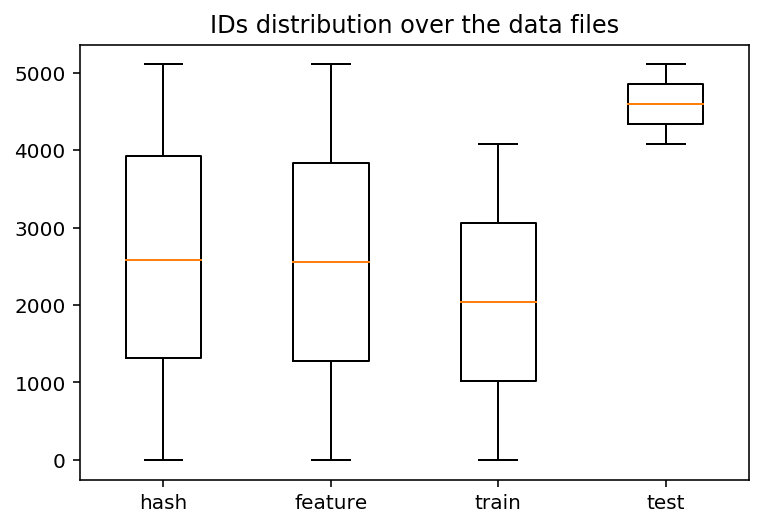

In [9]:
plt.boxplot([hashed_feature['id'], features['id'], train_set['id'], test_set['id']], 
            labels=['hash', 'feature','train','test']);
plt.title('IDs distribution over the data files');

In [10]:
train_set['id'].min(), train_set['id'].max() , test_set['id'].min(), test_set['id'].max()

(0, 4083, 4084, 5105)

In [11]:
train_set["target"].value_counts(normalize=True)

0    0.736778
1    0.263222
Name: target, dtype: float64

In [12]:
features['period'].value_counts()

12    5106
11    5106
10    5106
9     5106
8     5106
7     5106
6     5106
5     5106
4     5106
3     5106
2     5106
1     5106
Name: period, dtype: int64

Hashed analysis

In [13]:
hashed_feature['id'].value_counts()

4517    1278
3503     957
3329     925
4967     774
1885     756
629      752
2851     744
2534     706
4895     703
3821     659
4563     633
1369     617
2385     614
3933     611
4919     567
4278     528
4397     527
88       521
1992     521
4434     508
634      499
4361     498
1356     482
2940     481
4017     481
4264     446
4823     444
4077     435
3477     434
1534     433
3424     432
2966     430
4013     426
4186     421
2084     415
1620     414
3759     409
4840     397
4020     396
2464     394
395      393
2272     393
4846     389
4707     388
1663     384
1628     382
4480     381
291      378
388      376
2022     375
591      371
3451     366
3678     364
1467     363
2259     363
1304     356
4712     352
2910     349
4849     349
3894     347
2376     342
1826     341
4028     338
911      338
3546     333
3011     333
3376     333
2530     332
4752     327
2742     326
433      326
204      325
587      324
4244     323
2557     323
2622     322
1270     321

In [14]:
llen = []
idx = []
for i in range(0,len(hashed_feature['id'])):
    llen.append(len(hashed_feature[hashed_feature['id']==i]))
    idx.append(i)
print(min(llen), max(llen))

0 1278


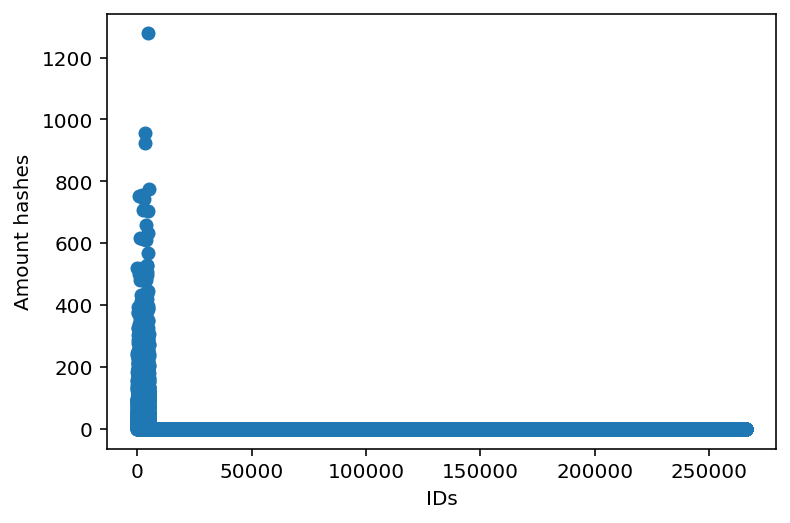

In [15]:
plt.scatter(x = idx , y = llen);
plt.xlabel('IDs');
plt.ylabel('Amount hashes');

In [16]:
#There are a lot of unsued ids in the hashed_feature.csv that need to be cleaned up.
#Each ID has up to 1278 hash values disclosing many to many relationship

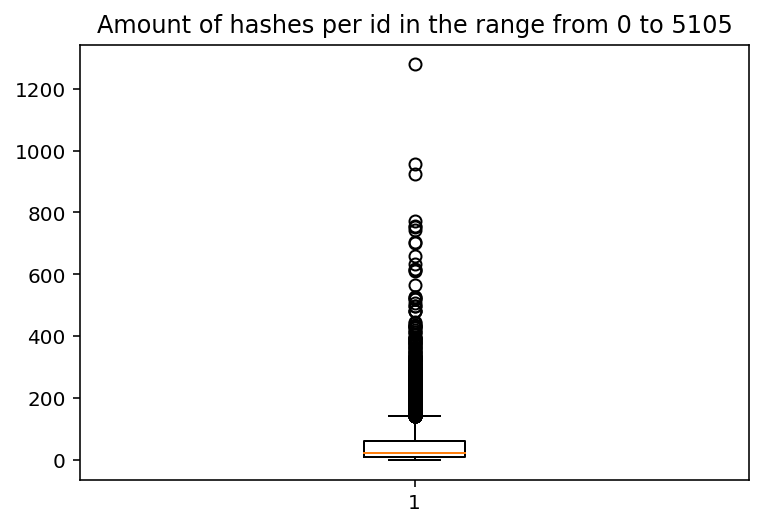

In [17]:
plt.boxplot(llen[:5105]);
plt.title('Amount of hashes per id in the range from 0 to 5105');

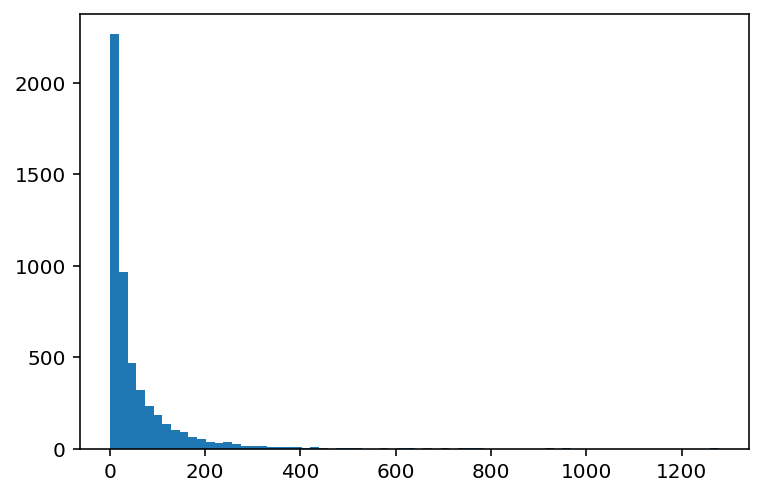

In [18]:
plt.hist(llen[:5105],bins=70);

In [19]:
# Removing ids that are not present in our training and test datat
hashed = hashed_feature[hashed_feature['id']<=5105]

In [20]:
#fill NA in hash, let's deviate from the rule when categorical feature encoding  after splitting into train and test
columns = hashed.dtypes[hashed.dtypes == 'object'].index
for i in columns:
            hashed[i].fillna(hashed[i].value_counts().index[0], inplace=True)

In [21]:
print(hashed.isnull().sum())

id            0
feature_50    0
dtype: int64


In [22]:
# Label encoder for hashes
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
hashed['hs'] = le.fit_transform(hashed['feature_50'])

In [23]:
hashed_median=hashed.groupby('id').median().reset_index()

In [24]:
hashed_median.shape

(5106, 2)

# DATA PREPARATION ON TRAIN AND TEST BEFORE ADD HASH

In [25]:
#remove cat feature and add later with hash
c=['id', 'feature_25']
feature_25 = features[c].copy()

In [26]:
features.drop('feature_25', axis=1, inplace=True)

In [27]:
feature_25.head()

,id,feature_25
0,0,f9ae10397ed62e79c644d06842bbcd92963a5927
1,0,f9ae10397ed62e79c644d06842bbcd92963a5927
2,0,f9ae10397ed62e79c644d06842bbcd92963a5927
3,0,f9ae10397ed62e79c644d06842bbcd92963a5927
4,0,11e623a37e87cf7995c466723ec99688d55cae8c


In [28]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
feature_25['hs1'] = le.fit_transform(feature_25['feature_25'])

In [29]:
# Dataframe for storing the matrix
feature_25_ohe = pd.get_dummies(feature_25, columns = ['hs1']).groupby(['id'],as_index=False).sum()

In [30]:
feature_25_ohe.head()

,id,hs1_0,hs1_1,hs1_2,hs1_3,hs1_4,hs1_5,hs1_6,hs1_7
0,0,7,0,1,0,0,0,0,4
1,1,0,0,0,0,0,0,0,12
2,2,1,0,0,11,0,0,0,0
3,3,9,0,0,0,0,0,0,3
4,4,0,0,0,0,0,0,0,12


In [31]:
feature_25_ohe.shape

(5106, 9)

In [32]:
train=features.merge(train_set)
train['period']=train['period'].astype(int)
train.head()

,id,period,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,target
0,0,1,110.0,55.0,0.432017,0.000000,176.78,0.0,0.323712,NaN,147.0,0.0,176.78,55.0,0.248711,0.001373,0.0,0.0,0.0,0.476549,333.60,0.277617,55.0,0.0,55.0,21.0,0.0,NaN,0.0,1.00,55.000000,93.0,5562.0,93.0,0.040283,182.0,0.000000,43.50,0.0,0.0,0.00,0.00,0,0.000000,0.0,55.0,2.0,0.526552,145.0,133.28,0.0,0
1,0,2,110.0,110.0,0.397517,0.000000,315.42,0.0,0.316798,NaN,135.0,0.0,315.42,110.0,0.261744,-0.002248,0.0,0.0,0.0,0.210951,428.78,0.290904,110.0,0.0,110.0,26.0,0.0,NaN,0.0,0.77,110.000000,114.0,5532.0,114.0,0.047588,181.0,0.000000,85.45,0.0,0.0,15.75,0.00,0,0.000000,0.0,110.0,1.0,0.481063,130.0,229.97,0.0,0
2,0,3,110.0,55.0,0.359440,0.000000,354.55,0.0,0.339188,NaN,181.0,0.0,354.48,55.0,0.302164,0.002083,0.0,0.0,0.0,0.058675,526.38,0.284842,55.0,0.0,55.0,36.0,0.0,NaN,0.0,0.05,85249.281058,135.0,5501.0,136.0,0.051470,180.0,0.000000,122.70,0.0,0.0,0.00,0.07,0,0.000000,0.0,55.0,1.0,0.509598,180.0,231.78,0.0,0
3,0,4,110.0,55.0,0.285707,0.000000,229.98,0.0,0.415428,NaN,142.0,0.0,229.98,55.0,0.347660,0.005207,0.0,0.0,0.0,0.966854,398.98,0.285235,55.0,0.0,55.0,30.0,0.0,NaN,0.0,0.00,55.000000,102.0,5471.0,102.0,0.076190,179.0,0.000000,46.15,0.0,0.0,0.00,0.00,0,0.000000,0.0,55.0,0.0,0.680089,142.0,183.83,0.0,0
4,0,5,110.0,55.0,0.101487,444.730391,307.12,0.0,0.569670,NaN,92.0,0.0,306.17,55.0,0.438425,0.025736,0.0,21.0,0.0,0.700180,215.17,0.161147,55.0,0.0,55.0,20.0,0.0,NaN,0.0,0.00,55.000000,82.0,5440.0,95.0,0.273205,178.0,373.498562,150.33,0.0,0.0,26.75,0.95,0,20.014485,0.0,55.0,0.0,0.776175,85.0,155.83,0.0,0


In [33]:
test=features.merge(test_set)
test['period']=test['period'].astype(int)
test.head()

,id,period,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,score
0,4084,1,110.0,77.66,0.494997,0.000000,209.00,0.0,0.201109,141.82,35.0,3.27,183.28,77.66,0.181976,0.002610,0.0,0.0,0.000000,0.838393,174.50,NaN,75.00,2.66,77.66,9.0,0.0,20.0,3.27,32.58,60.0,29.0,4451.0,44.0,0.032862,146.0,0.000000,62.53,0.0,0.0,0.10,0.87,0,-0.000000,0.0,75.00,3.0,0.035053,31.0,120.75,2.0,NaN
1,4084,2,110.0,161.86,0.448919,0.000000,193.65,0.0,0.167043,114.73,36.0,1.30,160.38,161.86,0.207897,0.004074,0.0,0.0,16181.098369,0.209477,154.73,NaN,150.00,11.86,161.86,-8.0,0.0,24.0,0.00,33.35,165.0,32.0,4421.0,47.0,0.045954,145.0,0.000000,43.25,0.0,0.0,6.65,1.69,0,-0.000000,0.0,150.00,2.0,0.037252,29.0,117.13,1.0,NaN
2,4084,3,110.0,85.00,0.385688,0.000000,130.27,0.0,0.161869,263.30,152.0,5.30,122.10,85.00,0.255406,0.005041,1.0,0.0,1.000000,0.626729,275.05,NaN,80.00,5.00,85.00,11.0,1.0,40.0,0.00,11.75,100.0,51.0,4390.0,61.0,0.062920,144.0,0.000000,28.30,0.0,0.0,0.00,2.87,0,0.000000,1.0,80.00,1.0,0.013951,151.0,93.80,2.0,NaN
3,4084,4,110.0,78.00,0.365817,0.000000,157.03,0.0,0.156286,787.50,215.0,1.38,148.10,78.00,0.280130,0.005876,0.0,0.0,0.000000,0.618390,804.75,NaN,75.00,3.00,78.00,3.0,0.0,27.0,0.00,17.25,85.0,30.0,4360.0,57.0,0.075233,143.0,0.000000,5.63,0.0,0.0,0.00,7.55,0,0.000000,0.0,75.00,1.0,0.005658,214.0,142.47,1.0,NaN
4,4084,5,110.0,85.08,0.105262,2041.945145,67.42,0.0,0.113863,430.43,126.0,10.72,51.70,85.08,0.355205,0.042197,0.0,8.0,1.000000,0.260960,459.53,NaN,75.08,10.00,85.08,5.0,1.0,32.0,0.00,29.10,85.0,37.0,4329.0,62.0,0.359863,142.0,2040.800154,3.73,0.0,0.0,0.00,5.00,0,0.056302,1.0,75.08,5.0,0.006493,121.0,47.97,3.0,NaN


In [34]:
test.shape, train.shape

((12264, 52), (49008, 52))

# PRIMARY FEATURE SELECTION

In [35]:
def basic_details(df):
    b = pd.DataFrame()
    b['Missing value'] = df.isnull().sum()
    b['N unique value'] = df.nunique()
    b['dtype'] = df.dtypes
    return b
det = basic_details(train)
det.sort_values(by='Missing value', ascending=False)[:300]

,Missing value,N unique value,dtype
feature_46,6605,42374,float64
feature_33,3099,44424,float64
feature_19,2961,44250,float64
feature_6,2945,45194,float64
feature_2,2885,44370,float64
feature_12,2848,44312,float64
feature_13,2747,38713,float64
feature_16,2643,1277,float64
feature_23,2574,453,float64
feature_18,2547,30933,float64


In [36]:
#fill NA
columns = train.dtypes[train.dtypes == 'float'].index

for i in columns:
            train[i].fillna(train[i].median(), inplace=True)
            test[i].fillna(train[i].median(), inplace=True)

In [37]:
det = basic_details(train)
det.sort_values(by='N unique value', ascending=False)[:300]

,Missing value,N unique value,dtype
feature_17,0,49008,float64
feature_6,0,45194,float64
feature_33,0,44424,float64
feature_2,0,44370,float64
feature_12,0,44313,float64
feature_19,0,44250,float64
feature_46,0,42374,float64
feature_13,0,38713,float64
feature_18,0,30933,float64
feature_7,0,30223,float64


In [38]:
counts = [[], [], []]
for c in [c for c in train.columns[2:]]:
    typ = train[c].dtype
    uniq = len(np.unique(train[c]))
    if uniq == 1: counts[0].append(c)
    elif uniq == 2: counts[1].append(c)
    elif uniq<70: counts[2].append(c)

print('Constant features: {} Binary features: {} Categorical features: {}\n'.format(*[len(c) for c in counts]))

print('Constant features:', counts[0])
print('Binary features:', counts[1])
print('Categorical features:', counts[2])

Constant features: 1 Binary features: 1 Categorical features: 3

Constant features: ['feature_41']
Binary features: ['target']
Categorical features: ['feature_0', 'feature_15', 'feature_43']


In [39]:
#delete feature with 1 unique = const 
const_drop = ['feature_41']
train.drop(const_drop, axis=1, inplace=True)
test.drop(const_drop, axis=1, inplace=True)

In [40]:
count = []
for c in [c for c in train.columns[2:]]:
    typ = train[c].dtype
    uniq = len(np.unique(train[c]))
    if uniq<70 and train[c].value_counts(normalize=True).values[0]>0.94: count.append(c)

print('Almost const features:', count)

Almost const features: ['feature_0']


In [41]:
#delete almost constant feature with 1 unique label >0.94 = const 
alm_const_drop = ['feature_0']
train.drop(alm_const_drop, axis=1, inplace=True)
test.drop(alm_const_drop, axis=1, inplace=True)

In [42]:
test.shape, train.shape

((12264, 50), (49008, 50))

# FEATURE GENERATION

In [43]:
train.drop(['target', 'period'],axis=1, inplace=True)
test.drop(['score', 'period'],axis=1, inplace=True)

In [44]:
mean_train = train.groupby("id").mean().add_suffix('_mean')
median_train = train.groupby("id").median().add_suffix('_median')
skew_train = train.groupby("id").skew().add_suffix('_skew')
#kurtosis_train = train.groupby("ID").kurtosis().add_suffix('_kurtosis')
std_train = train.groupby("id").std().add_suffix('_std')
min_train = train.groupby("id").min().add_suffix('_min')
quantile25_train = train.groupby("id").quantile(0.25).add_suffix('_quantile25')
quantile75_train = train.groupby("id").quantile(0.75).add_suffix('_quantile75')
max_train = train.groupby("id").max().add_suffix('_max')
sum_train = train.groupby("id").sum().add_suffix('_sum')
na_count_train = train.groupby("id").apply(lambda x: x.isnull().sum()).add_suffix('_na_count')
head_train = train.groupby("id").first()
tail_train = train.groupby("id").last()
abs_diff_train = head_train/tail_train
slope_train=((head_train/tail_train)>1)*1
abs_diff_train = abs_diff_train.replace(np.nan, 0).replace(np.inf, 0).replace(-np.inf, 0)
abs_diff_train = abs_diff_train.add_suffix('_abs_diff')
head_train = head_train.add_suffix('_head')
tail_train = tail_train.add_suffix('_tail')
slope_train=slope_train.add_suffix('_slope')
main_train = pd.concat([mean_train, median_train, skew_train, 
                       #kurtosis_train, 
                       std_train, min_train, quantile25_train,
                      quantile75_train, max_train, sum_train, na_count_train, head_train, tail_train, 
                        abs_diff_train, slope_train],
                      axis=1)


mean_test = test.groupby("id").mean().add_suffix('_mean')
median_test = test.groupby("id").median().add_suffix('_median')
skew_test = test.groupby("id").skew().add_suffix('_skew')
#kurtosis_test = test.groupby("ID").kurtosis().add_suffix('_kurtosis')
std_test = test.groupby("id").std().add_suffix('_std')
min_test = test.groupby("id").min().add_suffix('_min')
quantile25_test = test.groupby("id").quantile(0.25).add_suffix('_quantile25')
quantile75_test = test.groupby("id").quantile(0.75).add_suffix('_quantile75')
max_test = test.groupby("id").max().add_suffix('_max')
sum_test = test.groupby("id").sum().add_suffix('_sum')
na_count_test = test.groupby("id").apply(lambda x: x.isnull().sum()).add_suffix('_na_count')
head_test = test.groupby("id").first()
tail_test = test.groupby("id").last()
abs_diff_test = head_test/tail_test
slope_test=((head_test/tail_test)>1)*1
abs_diff_test = abs_diff_test.replace(np.nan, 0).replace(np.inf, 0).replace(-np.inf, 0)
abs_diff_test = abs_diff_test.add_suffix('_abs_diff')
head_test = head_test.add_suffix('_head')
tail_test = tail_test.add_suffix('_tail')
slope_test=slope_test.add_suffix('_slope')
main_test = pd.concat([mean_test, median_test, skew_test, 
                      #kurtosis_test, 
                      std_test, min_test, quantile25_test,
                      quantile75_test, max_test, sum_test, na_count_test, 
                      head_test, tail_test, abs_diff_test, slope_test],
                      axis=1)


In [45]:
main_train.shape, main_test.shape

((4084, 659), (1022, 659))

In [46]:
main_train = main_train.reset_index()
main_test = main_test.reset_index()

# SECONDARY FEATURE SELECTION

In [47]:
det = basic_details(main_train)
det.sort_values(by='N unique value', ascending=False)[:1000]

,Missing value,N unique value,dtype
id,0,4084,int64
feature_17_min,0,4084,float64
feature_17_median,0,4084,float64
feature_17_tail,0,4084,float64
feature_17_skew,0,4084,float64
feature_17_head,0,4084,float64
feature_17_mean,0,4084,float64
feature_17_std,0,4084,float64
feature_17_quantile75,0,4084,float64
feature_17_sum,0,4084,float64


In [48]:
counts = [[], [], []]
for c in [c for c in main_train.columns[2:]]:
    typ = main_train[c].dtype
    uniq = len(np.unique(main_train[c]))
    if uniq == 1: counts[0].append(c)
    elif uniq == 2: counts[1].append(c)
    elif uniq<70: counts[2].append(c)

print('Constant features: {} Binary features: {} Categorical features: {}\n'.format(*[len(c) for c in counts]))

print('Constant features:', counts[0])
print('Binary features:', counts[1])
print('Categorical features:', counts[2])

Constant features: 49 Binary features: 47 Categorical features: 17

Constant features: ['id_na_count', 'feature_1_na_count', 'feature_2_na_count', 'feature_3_na_count', 'feature_4_na_count', 'feature_5_na_count', 'feature_6_na_count', 'feature_7_na_count', 'feature_8_na_count', 'feature_9_na_count', 'feature_10_na_count', 'feature_11_na_count', 'feature_12_na_count', 'feature_13_na_count', 'feature_14_na_count', 'feature_15_na_count', 'feature_16_na_count', 'feature_17_na_count', 'feature_18_na_count', 'feature_19_na_count', 'feature_20_na_count', 'feature_21_na_count', 'feature_22_na_count', 'feature_23_na_count', 'feature_24_na_count', 'feature_26_na_count', 'feature_27_na_count', 'feature_28_na_count', 'feature_29_na_count', 'feature_30_na_count', 'feature_31_na_count', 'feature_32_na_count', 'feature_33_na_count', 'feature_34_na_count', 'feature_35_na_count', 'feature_36_na_count', 'feature_37_na_count', 'feature_38_na_count', 'feature_39_na_count', 'feature_40_na_count', 'feature_

In [49]:
#drop constant feature
conts_drop =['id_na_count', 'feature_1_na_count', 'feature_2_na_count', 'feature_3_na_count', 'feature_4_na_count', 'feature_5_na_count', 'feature_6_na_count', 'feature_7_na_count', 'feature_8_na_count', 'feature_9_na_count', 'feature_10_na_count', 'feature_11_na_count', 'feature_12_na_count', 'feature_13_na_count', 'feature_14_na_count', 'feature_15_na_count', 'feature_16_na_count', 'feature_17_na_count', 'feature_18_na_count', 'feature_19_na_count', 'feature_20_na_count', 'feature_21_na_count', 'feature_22_na_count', 'feature_23_na_count', 'feature_24_na_count', 'feature_26_na_count', 'feature_27_na_count', 'feature_28_na_count', 'feature_29_na_count', 'feature_30_na_count', 'feature_31_na_count', 'feature_32_na_count', 'feature_33_na_count', 'feature_34_na_count', 'feature_35_na_count', 'feature_36_na_count', 'feature_37_na_count', 'feature_38_na_count', 'feature_39_na_count', 'feature_40_na_count', 'feature_42_na_count', 'feature_43_na_count', 'feature_44_na_count', 'feature_45_na_count', 'feature_46_na_count', 'feature_47_na_count', 'feature_48_na_count', 'feature_49_na_count', 'feature_46_tail']
main_train.drop(conts_drop, axis=1, inplace=True)
main_test.drop(conts_drop, axis=1, inplace=True)

In [50]:
count = []
for c in [c for c in main_train.columns[2:]]:
    typ = main_train[c].dtype
    uniq = len(np.unique(main_train[c]))
    if uniq<40 and main_train[c].value_counts(normalize=True).values[0]>0.94: count.append(c)

print('Almost const features:', count)

Almost const features: ['feature_14_min', 'feature_16_min', 'feature_24_min', 'feature_37_min', 'feature_39_min', 'feature_43_min', 'feature_38_slope']


In [51]:
almost_conts_drop = ['feature_14_min', 'feature_16_min', 'feature_24_min', 'feature_37_min', 'feature_39_min', 'feature_43_min', 'feature_38_slope']
main_train.drop(almost_conts_drop, axis=1, inplace=True)
main_test.drop(almost_conts_drop, axis=1, inplace=True)

In [52]:
main_train.shape, main_test.shape

((4084, 604), (1022, 604))

# ADDING HASH

In [53]:
main_train=main_train.merge(hashed_median, how='left', on="id")
main_test=main_test.merge(hashed_median, how='left', on="id")

In [54]:
main_train.shape, main_test.shape

((4084, 605), (1022, 605))

In [55]:
main_train=main_train.merge(feature_25_ohe, how='left', on="id")
main_test=main_test.merge(feature_25_ohe, how='left', on="id")

In [56]:
#adding target
main_train=main_train.merge(train_set, how='left', on="id")

In [57]:
main_train.shape, main_test.shape

((4084, 614), (1022, 613))

# THIRDLY FEATURE SELECTION

In [58]:
#select feature by minimum sum of correlation and shap value
X_train, X_test, y_train, y_test = train_test_split(main_train.drop([ 'target', 'id'],axis=1), 
                                                               main_train['target'],
                                                                test_size=0.3, 
                                                               stratify=main_train['target'],
                                                                 random_state=42)

In [59]:
corr = X_train.corr()
corr.head()

,feature_1_mean,feature_2_mean,feature_3_mean,feature_4_mean,feature_5_mean,feature_6_mean,feature_7_mean,feature_8_mean,feature_9_mean,feature_10_mean,feature_11_mean,feature_12_mean,feature_13_mean,feature_14_mean,feature_15_mean,feature_16_mean,feature_17_mean,feature_18_mean,feature_19_mean,feature_20_mean,feature_21_mean,feature_22_mean,feature_23_mean,feature_24_mean,feature_26_mean,feature_27_mean,feature_28_mean,feature_29_mean,feature_30_mean,feature_31_mean,feature_32_mean,feature_33_mean,feature_34_mean,feature_35_mean,feature_36_mean,feature_37_mean,feature_38_mean,feature_39_mean,feature_40_mean,feature_42_mean,feature_43_mean,feature_44_mean,feature_45_mean,feature_46_mean,feature_47_mean,feature_48_mean,feature_49_mean,feature_1_median,feature_2_median,feature_3_median,feature_4_median,feature_5_median,feature_6_median,feature_7_median,feature_8_median,feature_9_median,feature_10_median,feature_11_median,feature_12_median,feature_13_median,feature_14_median,feature_15_median,feature_16_median,feature_17_median,feature_18_median,feature_19_median,feature_20_median,feature_21_median,feature_22_median,feature_23_median,feature_24_median,feature_26_median,feature_27_median,feature_28_median,feature_29_median,feature_30_median,feature_31_median,feature_32_median,feature_33_median,feature_34_median,feature_35_median,feature_36_median,feature_37_median,feature_38_median,feature_39_median,feature_40_median,feature_42_median,feature_43_median,feature_44_median,feature_45_median,feature_46_median,feature_47_median,feature_48_median,feature_49_median,feature_1_skew,feature_2_skew,feature_3_skew,feature_4_skew,feature_5_skew,feature_6_skew,feature_7_skew,feature_8_skew,feature_9_skew,feature_10_skew,feature_11_skew,feature_12_skew,feature_13_skew,feature_14_skew,feature_15_skew,feature_16_skew,feature_17_skew,feature_18_skew,feature_19_skew,feature_20_skew,feature_21_skew,feature_22_skew,feature_23_skew,feature_24_skew,feature_26_skew,feature_27_skew,feature_28_skew,feature_29_skew,feature_30_skew,feature_31_skew,feature_32_skew,feature_33_skew,feature_34_skew,feature_35_skew,feature_36_skew,feature_37_skew,feature_38_skew,feature_39_skew,feature_40_skew,feature_42_skew,feature_43_skew,feature_44_skew,feature_45_skew,feature_46_skew,feature_47_skew,feature_48_skew,feature_49_skew,feature_1_std,feature_2_std,feature_3_std,feature_4_std,feature_5_std,feature_6_std,feature_7_std,feature_8_std,feature_9_std,feature_10_std,feature_11_std,feature_12_std,feature_13_std,feature_14_std,feature_15_std,feature_16_std,feature_17_std,feature_18_std,feature_19_std,feature_20_std,feature_21_std,feature_22_std,feature_23_std,feature_24_std,feature_26_std,feature_27_std,feature_28_std,feature_29_std,feature_30_std,feature_31_std,feature_32_std,feature_33_std,feature_34_std,feature_35_std,feature_36_std,feature_37_std,feature_38_std,feature_39_std,feature_40_std,feature_42_std,feature_43_std,feature_44_std,feature_45_std,feature_46_std,feature_47_std,feature_48_std,feature_49_std,feature_1_min,feature_2_min,feature_3_min,feature_4_min,feature_5_min,feature_6_min,feature_7_min,feature_8_min,feature_9_min,feature_10_min,feature_11_min,feature_12_min,feature_13_min,feature_15_min,feature_17_min,feature_18_min,feature_19_min,feature_20_min,feature_21_min,feature_22_min,feature_23_min,feature_26_min,feature_27_min,feature_28_min,feature_29_min,feature_30_min,feature_31_min,feature_32_min,feature_33_min,feature_34_min,feature_35_min,feature_36_min,feature_38_min,feature_40_min,feature_42_min,feature_44_min,feature_45_min,feature_46_min,feature_47_min,feature_48_min,feature_49_min,feature_1_quantile25,feature_2_quantile25,feature_3_quantile25,feature_4_quantile25,feature_5_quantile25,feature_6_quantile25,feature_7_quantile25,feature_8_quantile25,feature_9_quantile25,feature_10_quantile25,feature_11_quantile25,feature_12_quantile25,feature_13_quantile25,feature_14_quantile25,feature_15_quantile25,feature_16_quantile25,feature_17_quantile25,feature_1

In [60]:
for col in corr.columns:
    print(col, corr[col].sum(axis=0))

feature_1_mean 94.80913422531093
feature_2_mean -30.173398017443844
feature_3_mean 51.569356555512535
feature_4_mean 103.32158917485386
feature_5_mean 44.7822132844191
feature_6_mean 17.426989130053194
feature_7_mean 79.9896352231315
feature_8_mean 113.84620214361374
feature_9_mean 24.86132473860565
feature_10_mean 97.55105081263865
feature_11_mean 8.762994993681975
feature_12_mean 65.1165715939215
feature_13_mean 3.6950488837682656
feature_14_mean 48.73728337715385
feature_15_mean 83.64183061603472
feature_16_mean 8.307603725718241
feature_17_mean 6.780577736613684
feature_18_mean 85.48281286023102
feature_19_mean -49.25464892257733
feature_20_mean 98.57807857659145
feature_21_mean 52.80042167205738
feature_22_mean 10.771191487584627
feature_23_mean 107.29465631547825
feature_24_mean 46.73457775004001
feature_26_mean 110.02768354689508
feature_27_mean 71.7685933764916
feature_28_mean 68.16210969450938
feature_29_mean 4.793063182709546
feature_30_mean 112.05515600293631
feature_31_mean

feature_9_quantile25 72.08976002799119
feature_10_quantile25 94.64031429226884
feature_11_quantile25 92.00346944572769
feature_12_quantile25 60.79946234510086
feature_13_quantile25 12.49166775850755
feature_14_quantile25 44.003612764999865
feature_15_quantile25 79.72308382639132
feature_16_quantile25 44.54086542713963
feature_17_quantile25 0.8581942316864191
feature_18_quantile25 84.06962538846368
feature_19_quantile25 -47.68352977025175
feature_20_quantile25 90.51390158847792
feature_21_quantile25 46.65511049146214
feature_22_quantile25 96.11391265221643
feature_23_quantile25 102.3063727682925
feature_24_quantile25 40.05510473579004
feature_26_quantile25 107.8851824170299
feature_27_quantile25 60.59837634841931
feature_28_quantile25 65.1201943305428
feature_29_quantile25 71.24232220427382
feature_30_quantile25 109.1083089250645
feature_31_quantile25 21.8769925885693
feature_32_quantile25 112.63358241155021
feature_33_quantile25 51.92635612680838
feature_34_quantile25 21.73074957773932

feature_1_tail 78.0485608376664
feature_2_tail -14.035520729496396
feature_3_tail 39.95887104961753
feature_4_tail 88.01550775643007
feature_5_tail 23.746162708803105
feature_6_tail 6.216270104068636
feature_7_tail 65.69458152722052
feature_8_tail 92.87793333426438
feature_9_tail 7.8182173923717295
feature_10_tail 83.49037153747685
feature_11_tail 4.727516743546413
feature_12_tail 56.61382273056681
feature_13_tail 2.077020767889815
feature_14_tail 36.60974160611687
feature_15_tail 56.37902818965206
feature_16_tail 2.9299615102398335
feature_17_tail -0.07932810436023252
feature_18_tail 69.87841762558713
feature_19_tail -37.157342782590476
feature_20_tail 78.85817659444709
feature_21_tail 38.5705349615071
feature_22_tail 3.1870226821189065
feature_23_tail 86.439994472512
feature_24_tail 34.38648291244617
feature_26_tail 104.24440321744703
feature_27_tail 52.84542790558782
feature_28_tail 50.81282587213069
feature_29_tail 2.60739906075458
feature_30_tail 104.63031388126734
feature_31_tail

In [61]:
corr_select_cols = [ 

'feature_6_min',
'feature_17_quantile25',
'feature_13_slope',
'feature_46_abs_diff',
'feature_46_head',
'feature_46_quantile75',
'feature_38_abs_diff',
'feature_17_tail',
'feature_32_abs_diff',
'feature_39_abs_diff',
'feature_27_skew',
'feature_36_abs_diff',
'feature_9_abs_diff',
'feature_29_abs_diff',
'feature_2_max',
'feature_46_sum',
'feature_46_mean',
'feature_46_median',
'feature_5_abs_diff',
'feature_13_head',
'feature_18_abs_diff',
'hs1_5',
'feature_46_quantile25',]


In [62]:
train_pool = Pool(X_train, y_train)
clf =  CatBoostClassifier(iterations=1200,
                           random_strength = 0.15,
                           random_seed=0, model_size_reg=0.1, task_type="GPU",
                           logging_level='Silent',  learning_rate = 0.08)

In [63]:
clf.fit(train_pool)

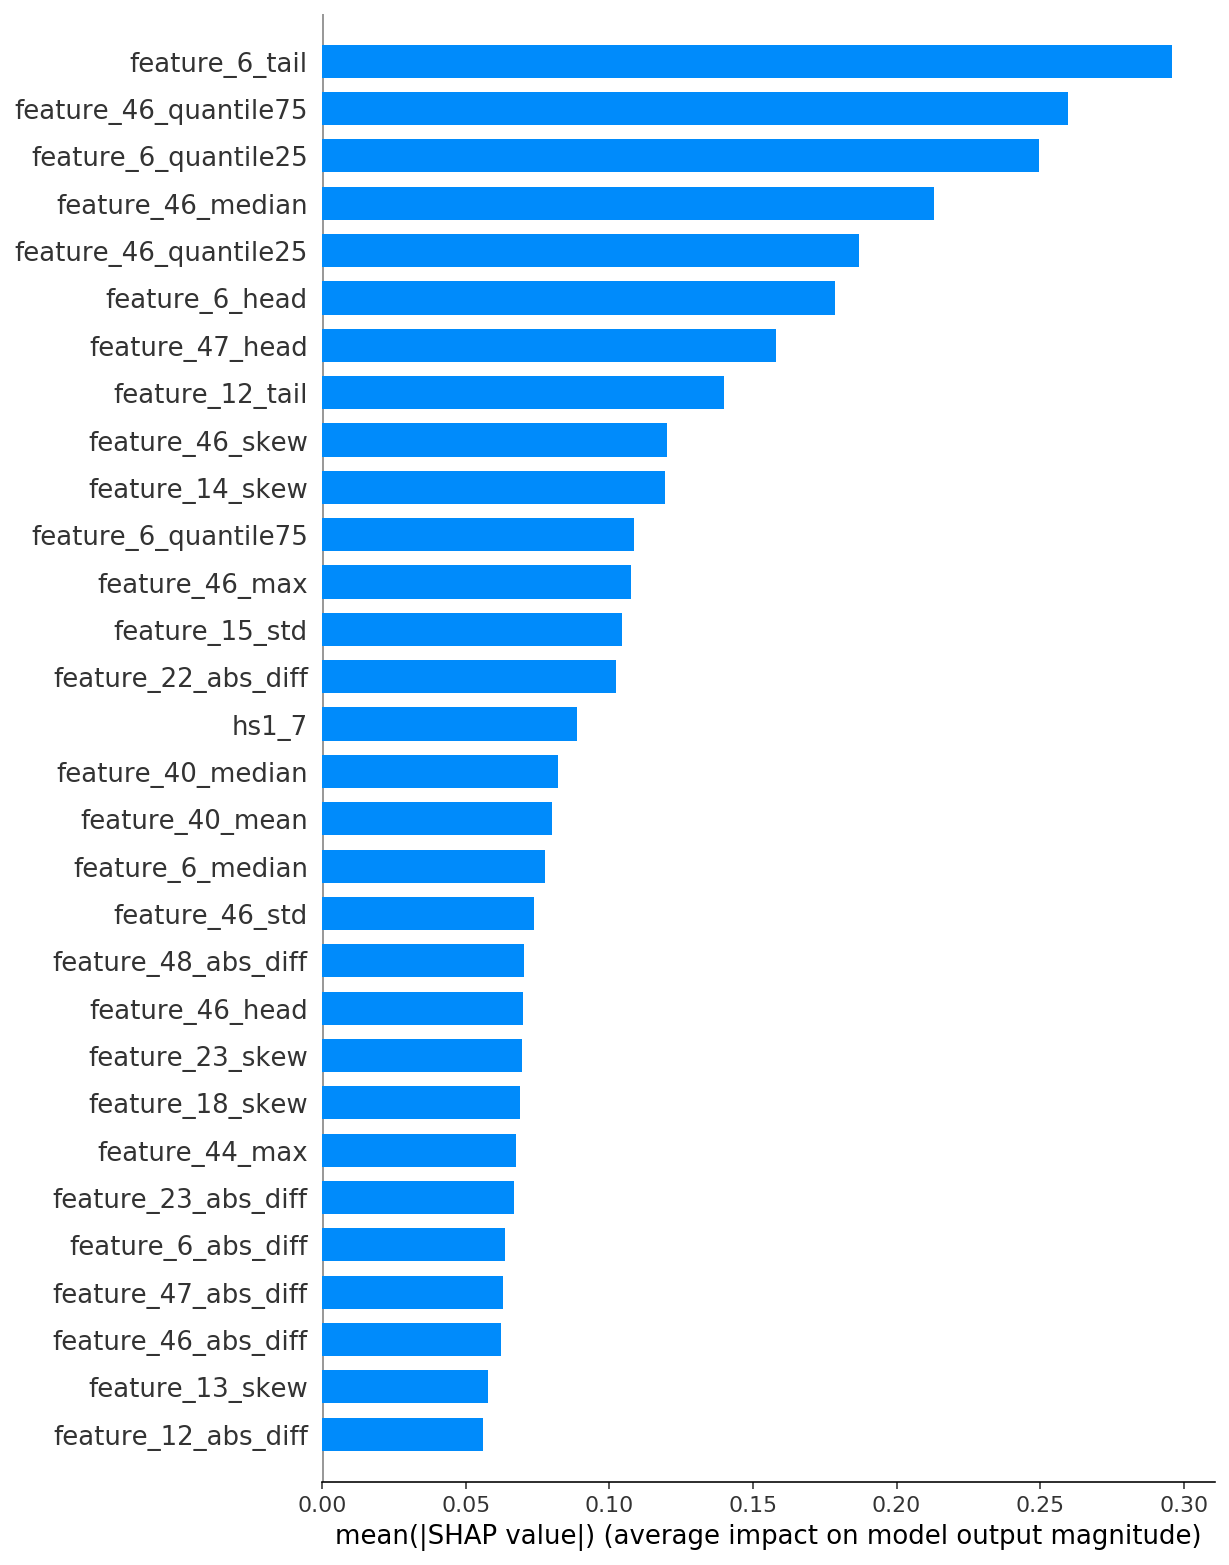

In [64]:
shap_values = clf.get_feature_importance(train_pool, fstr_type='ShapValues')
shap_values = shap_values[:, :-1]
shap.summary_plot(shap_values, X_train, plot_type='bar', max_display=30)

In [65]:
shap_select_cols = ['feature_6_tail',
                    
                    'feature_6_quantile25',
                    
                   
                    'feature_6_head',
                    'feature_47_head',
                    'feature_12_tail',
                    'feature_46_skew',
                    'feature_14_skew',
                    'feature_6_quantile75',
                    'feature_46_max',
                    'feature_15_std',  
                    'feature_22_abs_diff',  
                    'hs1_7']
    
    

In [66]:
select_cols = corr_select_cols + shap_select_cols

In [67]:
trainfull = main_train[select_cols]
testfull = main_test[select_cols]

In [68]:
det = basic_details(trainfull)
det.sort_values(by='N unique value', ascending=True)[:300]

,Missing value,N unique value,dtype
feature_13_slope,0,2,int32
hs1_5,0,3,uint8
hs1_7,0,13,uint8
feature_39_abs_diff,0,157,float64
feature_38_abs_diff,0,205,float64
feature_5_abs_diff,0,406,float64
feature_47_head,0,471,float64
feature_14_skew,0,1321,float64
feature_29_abs_diff,0,1566,float64
feature_9_abs_diff,0,2137,float64


In [69]:
trainfull.shape, testfull.shape

((4084, 35), (1022, 35))

# Crossvalidation for feature selection and tuning

In [70]:
#StratifiedKFold для ансамбля
import pandas as pd
import numpy as np
from mlxtend.classifier import EnsembleVoteClassifier
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score
from sklearn.model_selection import KFold, StratifiedKFold

from lightgbm import LGBMClassifier
import gc
excluded_feats = []


#y =labels
y = main_train['target']
data = trainfull
features = [f_ for f_ in data.columns if f_ not in excluded_feats]





folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)
oof_preds = np.zeros(data.shape[0])
#sub_preds = np.zeros(test.shape[0])
for n_fold, (trn_idx, val_idx) in enumerate(folds.split(data, y)):
    trn_x, trn_y = data[features].iloc[trn_idx], y.iloc[trn_idx]
    val_x, val_y = data[features].iloc[val_idx], y.iloc[val_idx]
    

    cat =  CatBoostClassifier(iterations=1600,
                           random_strength = 0.15, 
                           random_seed=0, 
                           model_size_reg=0.1, 
                             auto_class_weights = 'SqrtBalanced', 
                              task_type="GPU",
                              logging_level='Silent',  
                              learning_rate = 0.06)
                        
    cat1 =  CatBoostClassifier(iterations=1600,
                           random_strength = 0.15, 
                           random_seed=999, 
                             auto_class_weights = 'Balanced',
                               task_type="GPU",
                              logging_level='Silent',  
                              learning_rate = 0.06)


    boost_array = [ cat, cat1]

    eclf = EnsembleVoteClassifier(clfs=[ cat, cat1], 
                              voting='soft' #soft
                             )    
    
    
     
    eclf.fit(trn_x, trn_y )
    
    oof_preds[val_idx] = eclf.predict_proba(val_x)[:, 1] #[:, 1] predict probability of class 1 #LGBM ubrat [:, 0]
    #sub_preds += clfcv.predict(test[features], num_iteration=clfcv.best_iteration_)[:, 1] / folds.n_splits
    print('Fold %2d ROCAUC : %.6f' % (n_fold + 1,  roc_auc_score(val_y, oof_preds[val_idx])))
   # print('Fold %2d Acc score : %.6f' % (n_fold + 1,  accuracy_score(val_y, oof_preds[val_idx])))
 #   print('Fold %2d F1macro score : %.6f' % (n_fold + 1,  f1_score(val_y, oof_preds[val_idx], average="macro")))
 #   print('Fold %2d F1weight score : %.6f' % (n_fold + 1,  f1_score(val_y, oof_preds[val_idx], average="weighted")))
    del eclf, trn_x, trn_y, val_x, val_y
    gc.collect()
print('Full ROCAUC %.6f' % roc_auc_score(y, oof_preds))     
#print('Full Acc score %.6f' % accuracy_score(y, oof_preds))  
#print('Full F1macro score %.6f' % f1_score(y, oof_preds, average="macro"))  
#print('Full F1weight score %.6f' % f1_score(y, oof_preds, average="weighted"))    

Fold  1 ROCAUC : 0.700865
Fold  2 ROCAUC : 0.750182
Fold  3 ROCAUC : 0.716140
Fold  4 ROCAUC : 0.727536
Fold  5 ROCAUC : 0.740007
Full ROCAUC 0.725928


# predict for test data

In [71]:
#EnsembleVoteClassifier


excluded_feats = []
y = main_train['target']
X = trainfull

from mlxtend.classifier import EnsembleVoteClassifier
import warnings
import sklearn
import lightgbm as lgb
from xgboost import XGBClassifier, plot_importance

from catboost import CatBoostClassifier
warnings.filterwarnings('ignore')


 

# Create boosting classifiers


cat =  CatBoostClassifier(iterations=1600,
                           random_strength = 0.15, 
                           random_seed=0, 
                           model_size_reg=0.1, 
                              auto_class_weights = 'SqrtBalanced', task_type="GPU",
                              logging_level='Silent',  
                              learning_rate = 0.06)
                        
cat1 =  CatBoostClassifier(iterations=1600,
                           random_strength = 0.15, 
                           random_seed=999, 
                         
                              auto_class_weights = 'Balanced', task_type="GPU",
                              logging_level='Silent',  
                              learning_rate = 0.06)

boost_array = [ cat, cat1]

eclf = EnsembleVoteClassifier(clfs=[ cat, cat1], 
                              voting='soft' #soft
                             )

#labels = ['lgbm', 'cat', 'xgb_boost', 'Ensemble']

#for clf, label in zip([lgbm, cat, xgb_boost , eclf], labels):
 #   scores = sklearn.model_selection.cross_val_score(clf, X, y, cv=5, scoring='accuracy') # f1_weighted scoring = 'average_precision' scoring_micro = make_scorer(precision_score, average='micro')
 #   print("Mean: {0:.3f}, std: (+/-) {1:.3f} [{2}]".format(scores.mean(), scores.std(), label))

pred=eclf.fit(X, y).predict_proba(testfull)

# splinecalibration

In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, log_loss, label_ranking_loss, label_ranking_average_precision_score, coverage_error
from sklearn.metrics import accuracy_score, confusion_matrix


import ml_insights as mli

mli.__version__

'0.1.4'

In [73]:
y = y.to_numpy()

In [74]:
#~1.5 hour calculation I7 7700 1060 gpu 16gb ram
cv_train_preds = mli.cv_predictions(eclf, X, y)

In [75]:
calib_mc = mli.SplineCalib(random_state=42) #SplineCalibratedClassifierCV
calib_mc.fit(cv_train_preds, y, verbose=True)

Determining Calibration Function


In [76]:
test_probs_calibrated = calib_mc.calibrate(pred)


test_id = test_set['id'] 
subm= pd.DataFrame(test_probs_calibrated[:, 1], index=test_id, columns=['score'])
subm = subm.reset_index()


In [77]:
subm.to_csv('D:\Task_BigDataSchool\BigDataSchool5\BaidausPavel_test.csv')
subm.head()

,id,score
0,4084,0.144248
1,4085,0.193306
2,4086,0.189324
3,4087,0.196499
4,4088,0.246743
